# Union y cortede imagenes satelitales

In [1]:
import rasterio as rio
from rasterio.transform import xy
from rasterio import plot as rioplt
import matplotlib.pyplot as plt
import numpy as np

### Carga de las imagenes satelitales y la mascara

In [2]:
src_5069    = rio.open('../imageInput/LC08_L1TP_005069_20190806_20190820_01_T1/LC08_L1TP_005069_20190806_20190820_01_T1_B4.TIF')
src_6069    = rio.open('../imageInput/LC08_L1TP_006069_20190626_20190705_01_T1/LC08_L1TP_006069_20190626_20190705_01_T1_B4.TIF')
mask        = rio.open('../imageOutput/mask.tif')
mask_1      = mask.read(1) / 255

### Union de las imagenes en una nueva banda

In [3]:
newBand = np.zeros((2500, 3500), dtype='uint16')

medio = 900

oeste, norte = mask.xy(0, 0)
este, sur = mask.xy(2499, medio-1)
rowI, colI = src_6069.index(oeste, norte)
rowF, colF  = src_6069.index(este, sur)
newBand[:, :medio] = src_6069.read(1)[rowI:rowF+1, colI:colF+1]

oeste, norte = mask.xy(0, medio)
este, sur = mask.xy(2499, 3499)
rowI, colI = src_5069.index(oeste, norte)
rowF, colF  = src_5069.index(este, sur)
newBand[:, medio:] = src_5069.read(1)[rowI:rowF+1, colI:colF+1]

### Recorto la imagen con la mascara

In [4]:
aux = newBand
newBand = newBand * mask_1
newBand = newBand.astype('uint16')

### Guardo la imagen

In [5]:
new_src = rio.open(
    '../imageOutput/b4.tif',
    'w',
    driver='GTiff',
    height=2500,
    width=3500,
    count=1,
    dtype='uint16',
    crs='EPSG:32618',
    transform=mask.transform,
)
new_src.write(newBand, 1)
new_src.close()

### Grafico la imagen recortada

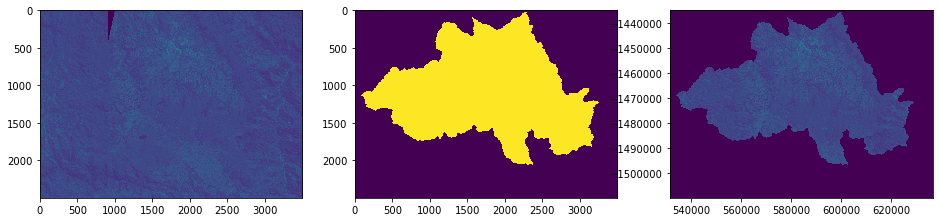

In [6]:
src_2 = rio.open('../imageOutput/b4.tif')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 16))
rioplt.show(aux, ax = ax1)
rioplt.show(mask_1, ax = ax2)
rioplt.show(src_2, ax = ax3)
plt.show()